<a href="https://colab.research.google.com/github/Slautin/SciFiReaders/blob/main/examples/MDTReader_Basic_Usage_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parsing .mdt experimental files. Basic example.

**Boris Slautin**

10/31/2025

In [4]:
#install the latest version of SciFiReaders
!pip install scifireaders
!pip install ipympl

**restart seccion to enable interactive plots**

In [8]:
#import libs
from SciFiReaders import MDTReader

import matplotlib.pyplot as plt

from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

In [2]:
#upload test file
!wget https://raw.githubusercontent.com/pycroscopy/SciFiDatasets/f7ab03ccc2b8c0253e98385ce31f4bf4eeeb053b/data/microscopy/spm/afm/test_mdt.mdt

--2025-11-26 06:44:44--  https://raw.githubusercontent.com/pycroscopy/SciFiDatasets/f7ab03ccc2b8c0253e98385ce31f4bf4eeeb053b/data/microscopy/spm/afm/test_mdt.mdt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041504 (1.9M) [application/octet-stream]
Saving to: ‘test_mdt.mdt’

test_mdt.mdt        100%[===================>]   1.95M  --.-KB/s    in 0.06s   

2025-11-26 06:44:44 (30.1 MB/s) - ‘test_mdt.mdt’ saved [2041504/2041504]



In [3]:
#initialize reader
reader = MDTReader("test_mdt.mdt")

In [4]:
#read file
reader.read()

{'000_Unknown': None,
 '001_1F:Iprobe': sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float64, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: Iprobe (nA)
  and Dimensions: 
 x:  x (um) of size (256,)
 y:  y (um) of size (256,)
  with metadata: ['date', 'version', 'uuid'],
 '002_Point_Cloud': {'point_0': sidpy.Dataset of type SPECTRUM with:
   dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
   data contains: Iprobe (nA)
   and Dimensions: 
  x:  BVValue (V) of size (3522,)
  channel:  generic (generic) of size (1,)
   with metadata: ['channels', 'units', 'coordinate', 'date', 'version', 'uuid'],
  'point_1': sidpy.Dataset of type SPECTRUM with:
   dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
   data contains: Iprobe (nA)
   and Dimensions: 
  x:  BVValue (V) of size (3522,)
  channel:  generic (generic) of size (1,)
   with metadata: ['chann

### Overview

**MDT binary** files have a complex internal structure, combining multiple types of experimental data, such as images, spectra, and point clouds (sparse arrays), all stored within a single file.

Some auxilary types of data such as text are not currently supported.

To handle this diversity efficiently, we have restructured the `MDTReader` to provide a clear and consistent output format.

The reader returns a Python dictionary, where each key represents a **single** measurement from the file.


---
### Key Naming Convention

Each dictionary key follows this pattern:


```
00N_Name
```

*   `N` — the sequential number of the measurement (e.g., 001, 002, …).
*   `Name` — the original measurement name from the MDT file (e.g. Height, 1F:IProbe, etc.).

Some data types in MDT files do not have explicit names.
For these, we use standardized labels:

* Spectral data: `00N_Spectrum`
* Point cloud data: `00N_Point_Cloud`

---

### Output structure

The reader returns a Python dictionary, where each key represents a single measurement from the file.

Each entry is represented by a `sidpy.Dataset`, which includes both the data and its assiciated metadata.

For `Point Cloud` measurements, the reader produces a nested dictionary instead of a single dataset. In this case, each individual spectrum is stored under a key of the form: `point_N`

More about `sidpy` format and pycroscopy: [link](https://pycroscopy.github.io/pycroscopy/ecosystem.html)




### Image

In [5]:
#@title scan

data = reader.read()
scan = data['001_1F:Iprobe']
print(scan)

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float64, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
x:  x (um) of size (256,)
y:  y (um) of size (256,)
 with metadata: ['date', 'version', 'uuid']


In [6]:
#metadata
scan.original_metadata

{'TextComment': {},
 'Parameters': {'Measurement': {'Scanning': {'Location': {'Location': '0'},
    'Angle': {'Angle': '0'}}},
  'Scan': {'SignalCID': {'SignalCID': '268435463'},
   'ReadyPointsX': {'ReadyPointsX': '256'},
   'ReadyPointsY': {'ReadyPointsY': '256'},
   'ReadyPointsZ': {'ReadyPointsZ': '1'},
   'XYZConseq': {'XYZConseq': '0'},
   'IsScanFrame1D': {'IsScanFrame1D': 'false'},
   'StartTime': {'StartTime': '16:55:45'},
   'ExecTime': {'ExecTime': '0:08:37'},
   'ScanDrive': {'ScanDrive': 'Tube Scanner'},
   'ScanMode': {'ScanMode': 'Spreading Resistance'}},
  'Common': {'BuildID': {'BuildID': 'Nova_Px 3.4.0.17277'},
   'Date': {'Date': '26.12.2022'},
   'Technic': {'Technic': 'Contact'},
   'Probe': {'Material': {'Material': 'Si'},
    'Coating': {'Coating': 'Unknown'},
    'Shape': {'Shape': 'Rectangular'},
    'FreqMin': {'FreqMin': '50'},
    'FreqMax': {'FreqMax': '100'},
    'ID': {'ID': 'FMG01'},
    'Length': {'Length': '225'},
    'Width': {'Width': '32'},
    'Thi

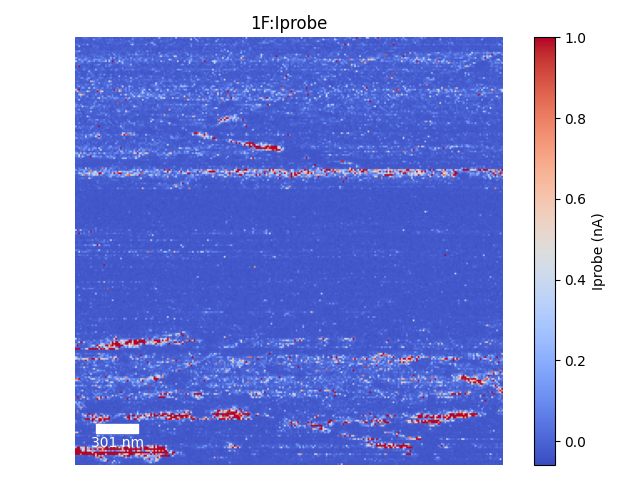

In [9]:
#visualization
scan.plot(vmax=1, scale_bar=True, cmap='coolwarm');

In [10]:
#scan as np.array
scan.compute()

array([[ 0.00152589, -0.00877387, -0.02708456, ..., -0.03433254,
        -0.0320437 , -0.02899192],
       [-0.02517719,  0.00228884, -0.00381473, ..., -0.02708456,
        -0.04005463, -0.04081757],
       [-0.02975487, -0.02136247, -0.02288836, ..., -0.02174394,
        -0.03700285, -0.0320437 ],
       ...,
       [-0.03433254, -0.00991829, -0.0194551 , ..., -0.03280665,
        -0.03166223, -0.03433254],
       [-0.0194551 , -0.02594014, -0.03356959, ..., -0.03051781,
        -0.03852874, -0.03547696],
       [-0.01716627, -0.02975487,  0.07515011, ..., -0.03280665,
        -0.03433254, -0.02555867]])

In [11]:
#@title spectrums and point clouds

data = reader.read()
pc = data['002_Point_Cloud']
print(pc)

{'point_0': sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
x:  BVValue (V) of size (3522,)
channel:  generic (generic) of size (1,)
 with metadata: ['channels', 'units', 'coordinate', 'date', 'version', 'uuid'], 'point_1': sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
x:  BVValue (V) of size (3522,)
channel:  generic (generic) of size (1,)
 with metadata: ['channels', 'units', 'coordinate', 'date', 'version', 'uuid'], 'point_2': sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
x:  BVValue (V) of size (3522,)
channel:  generic (generic) of size (1,)
 with metadata: ['channels', 'units', 'coordina

The point cloud is initially loaded as a dictionary, where each entry corresponds to a spectrum.

In [12]:
print(pc['point_1'])

sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(3522, 1), dtype=float64, chunksize=(3522, 1), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
x:  BVValue (V) of size (3522,)
channel:  generic (generic) of size (1,)
 with metadata: ['channels', 'units', 'coordinate', 'date', 'version', 'uuid']


In [13]:
#short metadata, icluding point's coordinate
pc['point_1'].metadata

{'channels': ['Iprobe'],
 'units': ['nA'],
 'coordinate': array([53.4435177 , 62.31308374]),
 'date': '4/5/2023 11:46:5',
 'version': 0.7000000000000001,
 'uuid': '35225116-2439-4022-807D-7C6A5C86C632'}

In [14]:
pc['point_1'].original_metadata

{'TextComment': {},
 'Parameters': {'Common': {'BuildID': {'BuildID': 'Nova_Px 3.4.0.17277'},
   'Date': {'Date': '26.12.2022'},
   'Technic': {'Technic': 'Contact'},
   'Probe': {'Material': {'Material': 'Si'},
    'Coating': {'Coating': 'Unknown'},
    'Shape': {'Shape': 'Rectangular'},
    'FreqMin': {'FreqMin': '50'},
    'FreqMax': {'FreqMax': '100'},
    'ID': {'ID': 'FMG01'},
    'Length': {'Length': '225'},
    'Width': {'Width': '32'},
    'Thickness': {'Thickness': '2.5'},
    'TipRadius': {'TipRadius': '10'},
    'TipAngle': {'TipAngle': '22'},
    'QualityFactor': {'QualityFactor': '238.01'},
    'ThermoAmp': {'ThermoAmp': '1'},
    'ResFreq': {'ResFreq': '55.35'},
    'LiqQualityFactor': {'LiqQualityFactor': '10'},
    'LiqResFreq': {'LiqResFreq': '20'},
    'Stiffness': {'Stiffness': '2.043'},
    'InvOptSens': {'InvOptSens': '9'},
    'HeadName': {'HeadName': 'SF005&AU007NTF'}},
   'Humidity': {'Humidity': '4.56'},
   'Temperature': {'Temperature': '25.21'}},
  'DeviceTy

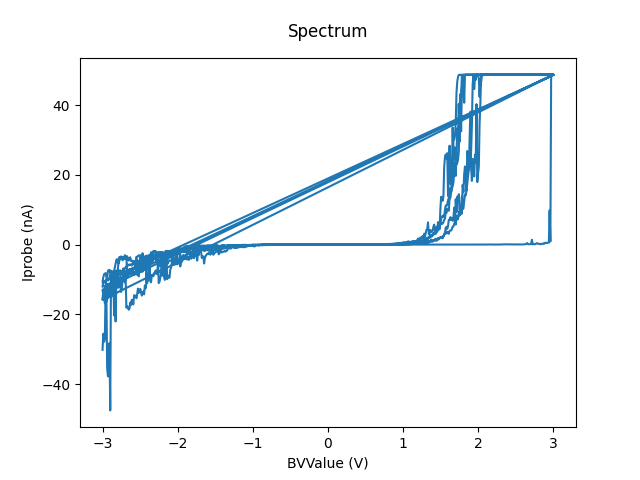

In [15]:
#row spectra in each point
pc['point_1'].plot();

Because the number of points varies slightly between locations, the original spectra cannot be combined into a single sparse array. For this reason, we provide the raw, unprocessed data as a dictionary of spectra. However, applying a minimal interpolation step allows us to convert the measurement into a uniform `Point Cloud` format.

In [16]:
#convert to Point Cloud

pc_conv = reader.to_point_cloud(pc)
print(pc_conv)

sidpy.Dataset of type POINT_CLOUD with:
 dask.array<array, shape=(25, 1, 3522), dtype=float64, chunksize=(25, 1, 3522), chunktype=numpy.ndarray>
 data contains: Iprobe (nA)
 and Dimensions: 
point number:  Point number (generic) of size (25,)
channel:  generic (generic) of size (1,)
x:  BVValue (V) of size (3522,)
 with metadata: ['channels', 'units', 'date', 'version', 'uuid']


In [17]:
#location coordinates are stored in .point_cloud attribute
pc_conv.point_cloud

{'coordinates': array([[53.4435177 , 62.07523571],
        [53.4435177 , 62.31308374],
        [53.4435177 , 62.55093176],
        [53.4435177 , 62.78877978],
        [53.4435177 , 63.0266278 ],
        [53.68982672, 62.07523571],
        [53.68982672, 62.31308374],
        [53.68982672, 62.55093176],
        [53.68982672, 62.78877978],
        [53.68982672, 63.0266278 ],
        [53.93613573, 62.07523571],
        [53.93613573, 62.31308374],
        [53.93613573, 62.55093176],
        [53.93613573, 62.78877978],
        [53.93613573, 63.0266278 ],
        [54.18244475, 62.07523571],
        [54.18244475, 62.31308374],
        [54.18244475, 62.55093176],
        [54.18244475, 62.78877978],
        [54.18244475, 63.0266278 ],
        [54.42875377, 62.07523571],
        [54.42875377, 62.31308374],
        [54.42875377, 62.55093176],
        [54.42875377, 62.78877978],
        [54.42875377, 63.0266278 ]])}

In [18]:
pc_conv.metadata

{'channels': ['Iprobe'],
 'units': ['nA'],
 'date': '4/5/2023 11:46:5',
 'version': 0.7000000000000001,
 'uuid': '35225116-2439-4022-807D-7C6A5C86C632'}

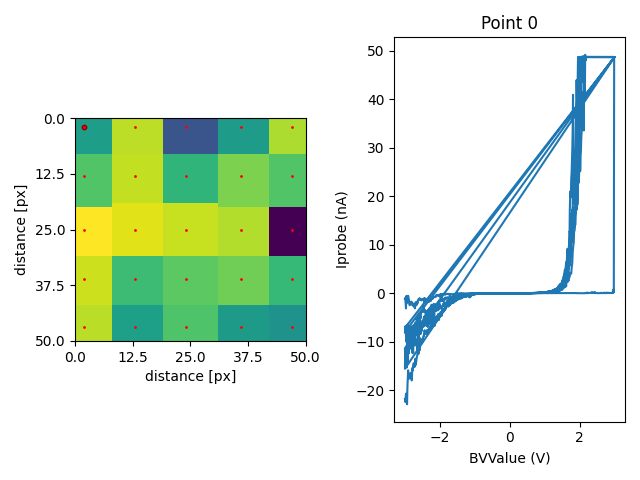

In [19]:
pc_conv.plot();